In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/iris (7).xls')

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


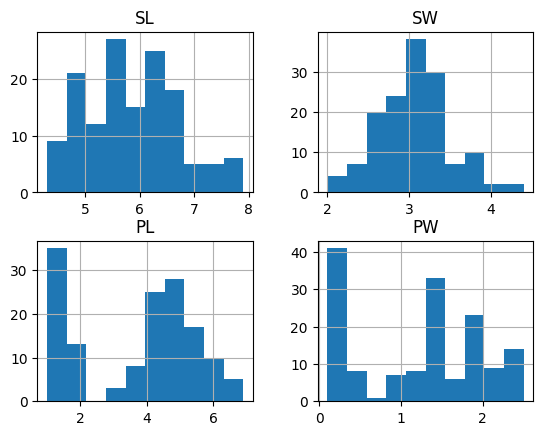

In [ ]:
data.hist()
plt.show()

In [ ]:
for i in ['SL', 'SW', 'PL', 'PW']:data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isnull().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x786539598fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x786539598ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865395989a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7865395992a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78653959bc70>],
 'means': []}

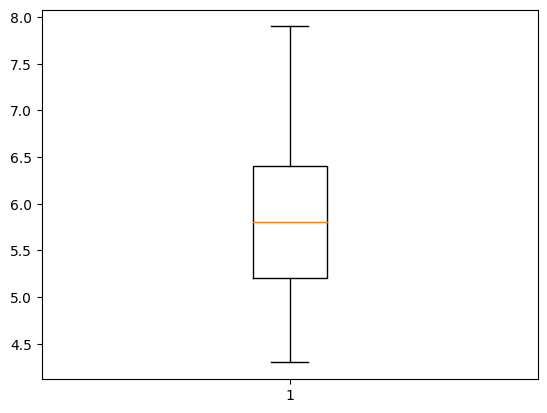

In [ ]:
plt.boxplot(data['SL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7865389ef9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7865389efee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865389edae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7865389ef2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865389ee4a0>],
 'means': []}

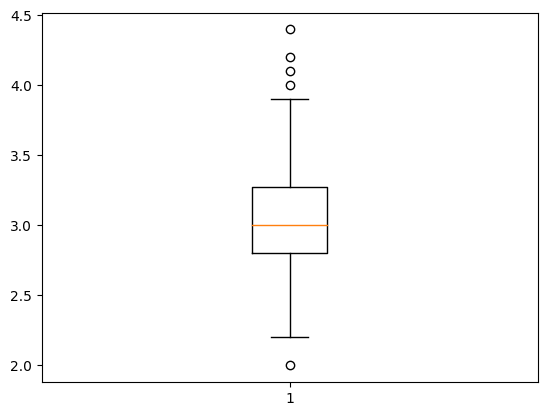

In [ ]:
plt.boxplot(data['SW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78653bad32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x78653bad2e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x78653bad1f30>],
 'medians': [<matplotlib.lines.Line2D at 0x78653bad2e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x78653bad2b00>],
 'means': []}

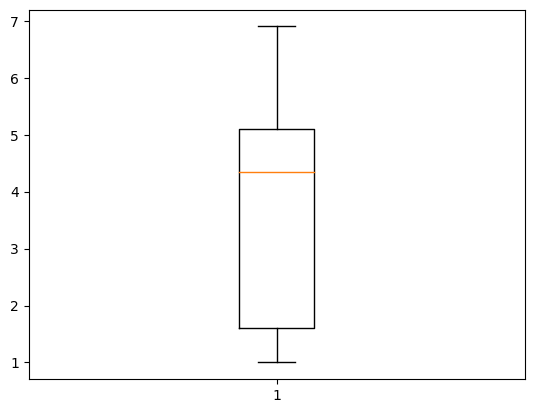

In [ ]:
plt.boxplot(data['PL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7865395acb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7865395af3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7865395ad660>],
 'medians': [<matplotlib.lines.Line2D at 0x7865395afaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7865395aecb0>],
 'means': []}

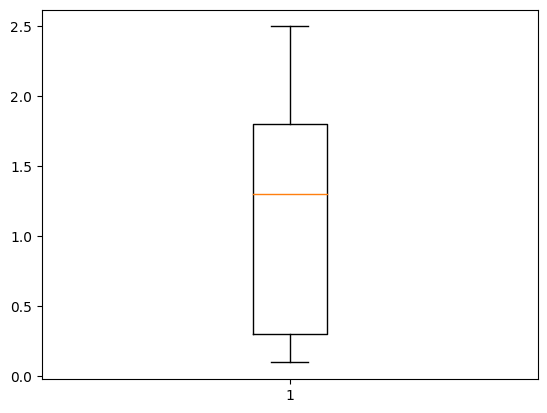

In [ ]:
plt.boxplot(data['PW'])

In [ ]:
Q1=np.percentile(data['SW'],25, interpolation='midpoint')
Q2=np.percentile(data['SW'],50, interpolation='midpoint')
Q3=np.percentile(data['SW'],75, interpolation='midpoint')

In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim = Q1-1.3*IQR
upp_lim = Q3 +1.5*IQR

In [ ]:
print('lower whisker', low_lim)
print('upper whisker',upp_lim)

lower whisker 2.2149999999999994
upper whisker 3.9250000000000003


In [ ]:
outlier = []
for y in data['SW']:
  if (y<low_lim) or (y>upp_lim):
   outlier.append(y)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0, 2.2, 2.2, 2.2]


In [ ]:
data['SW'] =data['SW'].clip(lower=low_lim,upper = upp_lim)

In [ ]:
outlier = []
for y in data['SW']:
  if (y<low_lim) or (y>upp_lim):
   outlier.append(y)
print(outlier)

[]


**Label Encording**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['Classification'].nunique()

3

In [ ]:
y= data['Classification']
x= data.drop('Classification',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
model1 =log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model = classifier.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

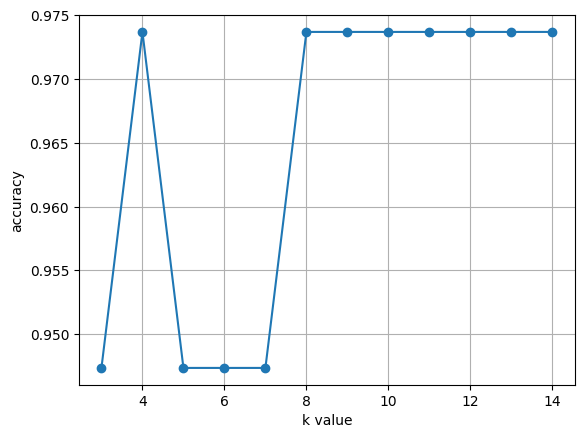

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
model2 = knn.fit(x_train,y_train)
y_pred_knn = model2.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_knn))

[[14  1  0]
 [ 0 10  1]
 [ 0  0 12]]


In [ ]:
print(accuracy_score(y_test,y_pred_knn))

0.9473684210526315


**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred =sv_cl.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt=dt_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:",confusion_matrix(y_test,y_pred_dt))

accuracy : 1.0
confusion matrix: [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50,random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred_rf=rf_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("accuracy :",accuracy_score(y_test,y_pred_rf))
print("confusion matrix:",confusion_matrix(y_test,y_pred_rf))

accuracy : 1.0
confusion matrix: [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


SVM, Decision Tree, RandomForest shows high accuracy value than KNN and Logistic regression , so SVM, Decision Tree and RandomForest are best models.